## Imports and Data Setup

In [1]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Preprocessing tools
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# Deep learning tols
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
df = pd.read_csv("Data/heart - heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Checking duplicates
df.duplicated().sum()

0

In [5]:
# Double checking nulls
df.isna().sum().sum()

0

## Preprocessing

In [6]:
# Let's check categorical columns for values
cols = df.select_dtypes("object").columns
# Getting loop of value counts
pieces = []

for col in cols:
    tmp_series = df[col].value_counts()
    tmp_series.name = col
    pieces.append(tmp_series)

# Concatenate the value counts Series into a DataFrame
df_value_counts = pd.concat(pieces, axis=1)

print(df_value_counts)

          Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
M       725.0            NaN         NaN             NaN       NaN
F       193.0            NaN         NaN             NaN       NaN
ASY       NaN          496.0         NaN             NaN       NaN
NAP       NaN          203.0         NaN             NaN       NaN
ATA       NaN          173.0         NaN             NaN       NaN
TA        NaN           46.0         NaN             NaN       NaN
Normal    NaN            NaN       552.0             NaN       NaN
LVH       NaN            NaN       188.0             NaN       NaN
ST        NaN            NaN       178.0             NaN       NaN
N         NaN            NaN         NaN           547.0       NaN
Y         NaN            NaN         NaN           371.0       NaN
Flat      NaN            NaN         NaN             NaN     460.0
Up        NaN            NaN         NaN             NaN     395.0
Down      NaN            NaN         NaN             NaN      

In [7]:
# Nothing unusual.
# Splitting data
target = 'HeartDisease'
X = df.drop(columns=target)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Save lists of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# There's no nulls to impute
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(scaler)
ohe_pipe = make_pipeline(ohe_encoder)
# Making a numeric tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
num_tuple = ('numeric', num_pipe, num_cols)
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

Numeric Columns: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')
OneHotEncoder Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [9]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple], 
                                    verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))],
                  verbose_feature_names_out=False)

In [10]:
# Fitting to training and transforming
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.239292,1.183802,1.307314,1.877849,0.551672,1.900458,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
362,0.239292,1.183802,-1.878000,-0.532524,-1.486343,-0.834739,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
869,0.558968,0.913811,0.096522,1.877849,0.831400,0.624033,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
101,-0.293501,-0.166155,-0.210833,-0.532524,-1.446382,-0.834739,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
199,0.345851,-0.166155,0.990645,-0.532524,-1.526304,0.076994,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## First Model

In [11]:
# Before we define our model, let's keep a variable for our input
# Save the number of features we have as our input shape
input_shape = X_train_tf.shape[1]
input_shape

20

In [12]:
# Sequential model
model = Sequential()

In [13]:
# First hidden layer
model.add(Dense(20, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [14]:
# Compile
model.compile(loss = 'bce', optimizer = 'adam',)
# Reviewing the model summary before training
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Fitting model with validation split
history = model.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test), 
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 1s 22ms/step - loss: 0.6882 - val_loss: 0.6525
Epoch 2/10
22/22 [==============================] - 0s 12ms/step - loss: 0.6063 - val_loss: 0.5805
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 0.5419 - val_loss: 0.5227
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 0.4885 - val_loss: 0.4730
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 0.4456 - val_loss: 0.4325
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4122 - val_loss: 0.4072
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3879 - val_loss: 0.3850
Epoch 8/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3706 - val_loss: 0.3698
Epoch 9/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3562 - val_loss: 0.3590
Epoch 10/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3447 - val_loss: 0.3490


In [20]:
# History.history is a dictionary
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [21]:
# Metric value for every training epoch
history.history['loss']

[0.688201904296875,
 0.6063058376312256,
 0.5419018864631653,
 0.4884796142578125,
 0.4455869793891907,
 0.4122229218482971,
 0.387874960899353,
 0.3706020414829254,
 0.35621559619903564,
 0.34470683336257935]

In [18]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):
       
    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]
    
    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)
    
    # For each metric
    for i, metric_name in enumerate(metrics):
    
        # Get the axis for the current metric
        ax = axes[i]
    
        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch
    
        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)
    
        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)
    
        # Final subplot adjustments 
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [23]:
# Sequential model
model = Sequential()

# First hidden layer
model.add(Dense(20, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [24]:
# Metrics are specified during the .compile step
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam'
              , metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')
                        ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Step 3: Fit our model
history = model.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test), 
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 2s 19ms/step - loss: 0.6335 - accuracy: 0.6642 - recall: 0.9069 - precision: 0.6350 - val_loss: 0.5797 - val_accuracy: 0.7565 - val_recall: 0.8636 - val_precision: 0.7500
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5457 - accuracy: 0.8038 - recall: 0.8777 - precision: 0.7876 - val_loss: 0.5165 - val_accuracy: 0.8043 - val_recall: 0.8106 - val_precision: 0.8425
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 0.4786 - accuracy: 0.8358 - recall: 0.8590 - precision: 0.8433 - val_loss: 0.4597 - val_accuracy: 0.8261 - val_recall: 0.8182 - val_precision: 0.8710
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 0.4261 - accuracy: 0.8459 - recall: 0.8537 - precision: 0.8629 - val_loss: 0.4183 - val_accuracy: 0.8391 - val_recall: 0.8182 - val_precision: 0.8926
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 0.3922 - accuracy: 0.8445 - recall: 0.8

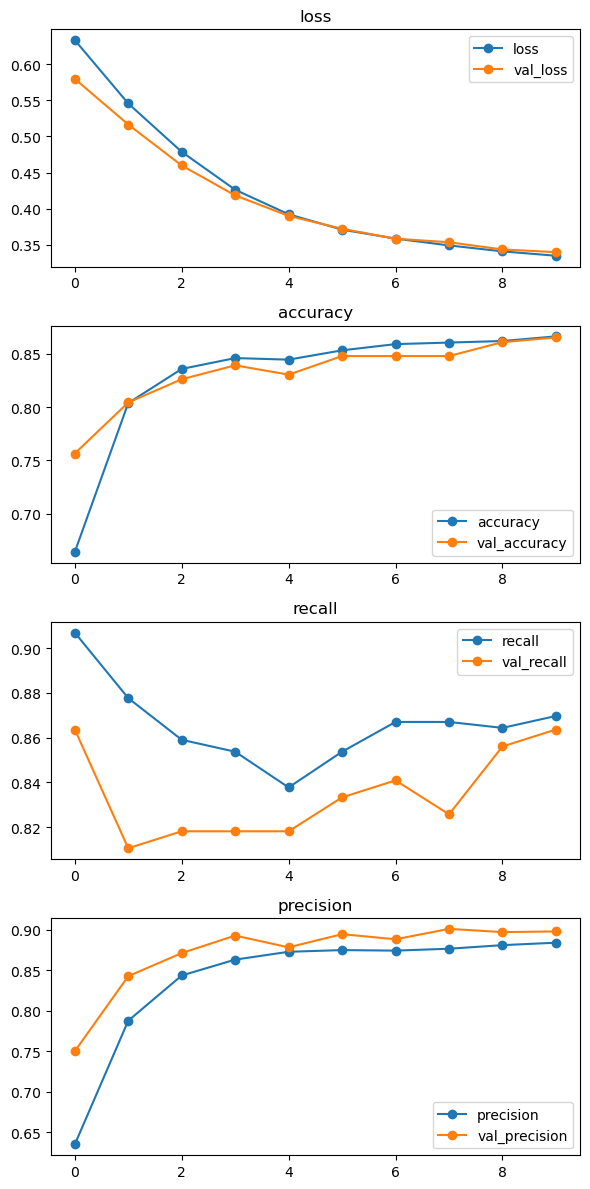

In [26]:
# Call the custom function
plot_history(history);

In [27]:
# make and round the predictions
y_pred_test = model.predict(X_test_tf)
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

8/8 [==============================] - 0s 5ms/step


array([[0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



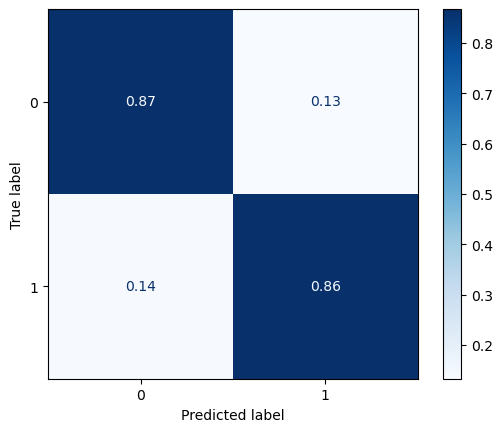

In [28]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_test))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

## Second Model

In [29]:
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(20, 
                input_dim = input_shape, 
                activation = 'relu')) 
# Second hidden layer
model.add(Dense(10, 
                activation = 'relu')) 
# Adding third hidden layer
model.add(Dense(5,
               activation = 'relu'))
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam'
              , metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')
                        ])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 5)                 55        
                                                                 
 dense_12 (Dense)            (None, 1)                 6         
                                                                 
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Fit our model
history = model.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test), 
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 2s 27ms/step - loss: 0.6810 - accuracy: 0.5785 - recall: 0.9707 - precision: 0.5668 - val_loss: 0.6269 - val_accuracy: 0.6913 - val_recall: 0.9545 - val_precision: 0.6597
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 0.6207 - accuracy: 0.7151 - recall: 0.9362 - precision: 0.6718 - val_loss: 0.5809 - val_accuracy: 0.7652 - val_recall: 0.9167 - val_precision: 0.7378
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 0.5705 - accuracy: 0.7616 - recall: 0.9309 - precision: 0.7172 - val_loss: 0.5269 - val_accuracy: 0.7957 - val_recall: 0.9091 - val_precision: 0.7742
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 0.5178 - accuracy: 0.8009 - recall: 0.9229 - precision: 0.7626 - val_loss: 0.4800 - val_accuracy: 0.8130 - val_recall: 0.8864 - val_precision: 0.8069
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 0.4698 - accuracy: 0.8198 - recall: 0.

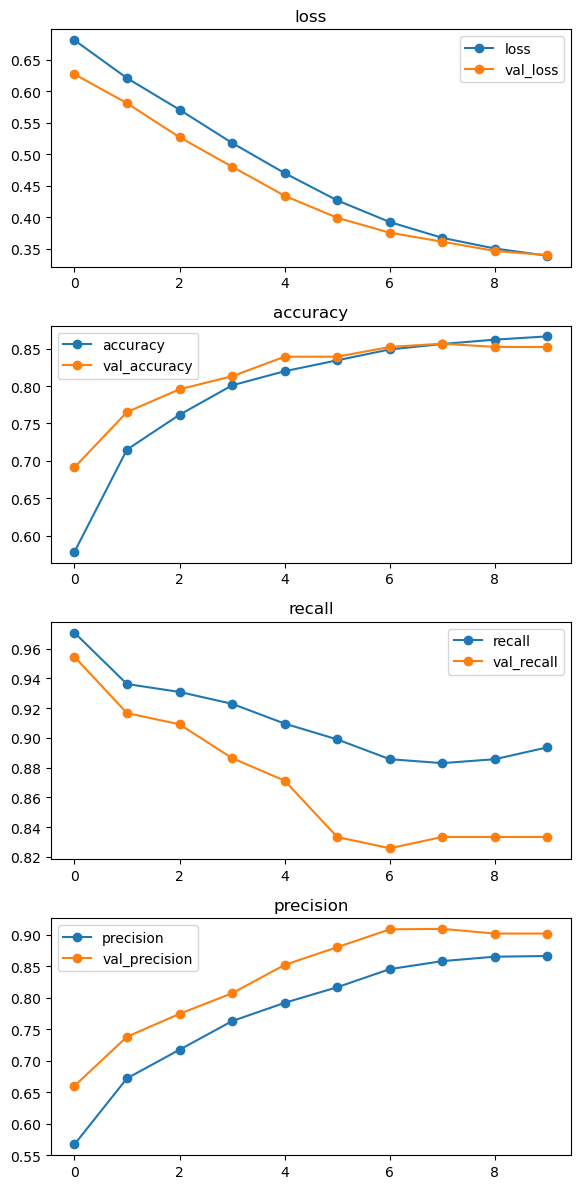

In [32]:
# Call the custom function
plot_history(history);

8/8 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        98
           1       0.90      0.83      0.87       132

    accuracy                           0.85       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.85      0.85       230



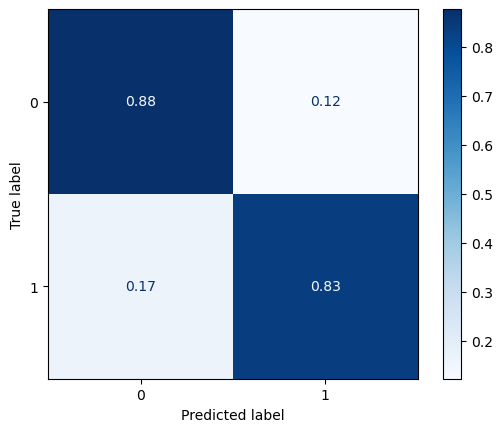

In [33]:
# make and round the predictions
y_pred_test = model.predict(X_test_tf)
y_pred_test = np.round(y_pred_test)
# Displaying metrics
print(classification_report(y_test, y_pred_test))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

## Third Model

In [34]:
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(20, 
                input_dim = input_shape, 
                activation = 'relu')) 
# Second hidden layer
model.add(Dense(15, 
                activation = 'relu')) 
# Adding third hidden layer
model.add(Dense(10,
               activation = 'relu'))
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [35]:
# Compile
model.compile(loss = 'bce', optimizer = 'adam'
              , metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')
                        ])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 15)                315       
                                                                 
 dense_15 (Dense)            (None, 10)                160       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Fit our model
history = model.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test), 
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 2s 21ms/step - loss: 0.7042 - accuracy: 0.4709 - recall: 0.0346 - precision: 0.9286 - val_loss: 0.6682 - val_accuracy: 0.5000 - val_recall: 0.1591 - val_precision: 0.8400
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6331 - accuracy: 0.6308 - recall: 0.4176 - precision: 0.8177 - val_loss: 0.6056 - val_accuracy: 0.7478 - val_recall: 0.6439 - val_precision: 0.8854
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5725 - accuracy: 0.7645 - recall: 0.7048 - precision: 0.8386 - val_loss: 0.5435 - val_accuracy: 0.8130 - val_recall: 0.8106 - val_precision: 0.8560
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5097 - accuracy: 0.8110 - recall: 0.8324 - precision: 0.8237 - val_loss: 0.4843 - val_accuracy: 0.8348 - val_recall: 0.8561 - val_precision: 0.8561
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4515 - accuracy: 0.8198 - recall: 0.8

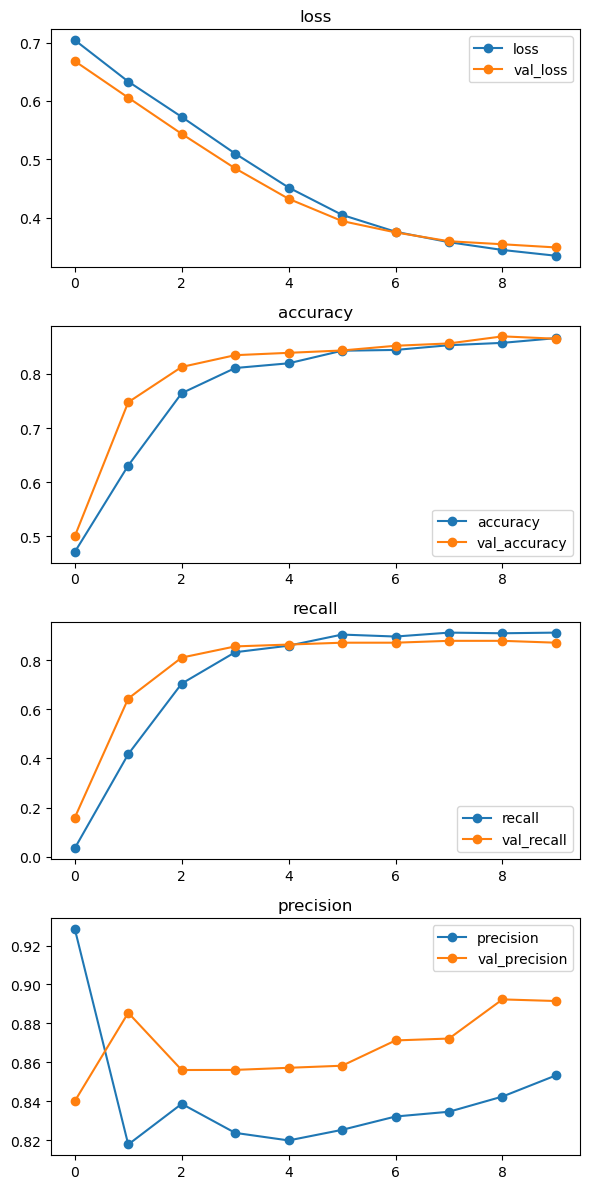

In [37]:
# Call the custom function
plot_history(history);

8/8 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        98
           1       0.89      0.87      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.87      0.87      0.87       230



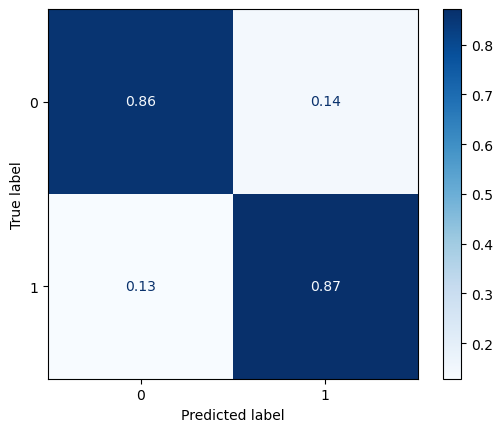

In [38]:
# make and round the predictions
y_pred_test = model.predict(X_test_tf)
y_pred_test = np.round(y_pred_test)
# Displaying metrics
print(classification_report(y_test, y_pred_test))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');